In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [11]:
LAMBDA = 589e-9
breadth = 4.94e-2
depth = 0.207e-2
length = 11.5e-2
g = 9.81
def straight_line(x, m, c): return m*x + c

## longitudinal

In [8]:
def x_axis(m, left_fringes, right_fringes):
    n_x = np.arange(1, len(left_fringes))
    D_x = (left_fringes - right_fringes)
    D_x2 = np.power(D_x, 2)
    
    # Dnx = 2xn => xn^2 = Dnx^2/4
    rho_x = ((D_x2) - np.min(D_x2)) / 4
    R_x = (rho_x[1:]*1000)/(n_x*589)
    R_avg_x = np.mean(R_x)
    
    print(f'For {m}g:')
    print('D:', D_x)
    print('Dx^2:', D_x2)
    print('rho_x:', rho_x)
    print('R_x:', R_x)
    print('R_avg_x:', R_avg_x)
    
    return rho_x

### 200g load (x-axis)

In [9]:
m1 = 200
left_fringes_1 = np.array([9.24, 10.38, 11.18, 12.41, 13.05, 13.55, 14.10])
right_fringes_1 = np.array([5.40, 4.39, 3.20, 2.23, 1.48, 1.32, 0.18])
rho_x_1 = x_axis(m1, left_fringes_1, right_fringes_1)

For 200g:
D: [ 3.84  5.99  7.98 10.18 11.57 12.23 13.92]
Dx^2: [ 14.7456  35.8801  63.6804 103.6324 133.8649 149.5729 193.7664]
rho_x: [ 0.        5.283625 12.2337   22.2217   29.779825 33.706825 44.7552  ]
R_x: [ 8.97050085 10.38514431 12.57594793 12.63999363 11.44544143 12.66417657]
R_avg_x: 11.446867454253914


### 250g load (x-axis)

In [10]:
m2 = 250
left_fringes_2 = np.array([13.58, 15.  , 15.86, 16.53, 17.13, 17.64, 18.1 , 18.55])
right_fringes_2 = np.array([11.15,  9.22,  8.9 ,  8.13,  7.5 ,  6.92,  6.38,  5.89])
rho_x_2 = x_axis(m2, left_fringes_2, right_fringes_2)

For 250g:
D: [ 2.43  5.78  6.96  8.4   9.63 10.72 11.72 12.66]
Dx^2: [  5.9049  33.4084  48.4416  70.56    92.7369 114.9184 137.3584 160.2756]
rho_x: [ 0.        6.875875 10.634175 16.163775 21.708    27.253375 32.863375
 38.592675]
R_x: [11.67381154  9.02731324  9.14758065  9.2139219   9.25411715  9.29920062
  9.36033835]
R_avg_x: 9.568040492937412


### 300g load (x-axis)

In [21]:
m3 = 300
left_fringes_3 = np.array([13.03, 14.24, 15, 16.17, 16.69, 17.1, 17.56, 17.98])
right_fringes_3 = np.array([9.94, 9.04, 8.37, 7.82, 7.38, 6.91, 6.51, 6.12])
rho_x_3 = x_axis(m3, left_fringes_3, right_fringes_3)

For 300g:
D: [ 3.09  5.2   6.63  8.35  9.31 10.19 11.05 11.86]
Dx^2: [  9.5481  27.04    43.9569  69.7225  86.6761 103.8361 122.1025 140.6596]
rho_x: [ 0.        4.372975  8.6022   15.0436   19.282    23.572    28.1386
 32.777875]
R_x: [7.42440577 7.30237691 8.51363894 8.18421053 8.0040747  7.96225241
 7.95000606]
R_avg_x: 7.905852188073873


# Young's modulus

In [15]:
def youngs_modulus(mi, mj, rho_x_i, rho_x_j):
    yn_max = min(len(rho_x_i), len(rho_x_j))
    ys = 1/((1/rho_x_i[1:yn_max]) - (1/rho_x_j[1:yn_max]))
    xs = np.arange(1, yn_max)
    # print(ys)
    popt, pcov = curve_fit(straight_line, xs, ys)
    # rho_x_1.shape, rho_x_2.shape
    slope = popt[0]
    Y = (slope*10e-6*12*(mi-mj)*0.001*g*length)/(breadth*(depth**3)*LAMBDA)
    print(f'{Y/10e9} GPa')

In [16]:
youngs_modulus(m1, m2, rho_x_1, rho_x_2)

70.16565861485083 GPa


In [22]:
youngs_modulus(m2, m3, rho_x_2, rho_x_3)

82.00257877715805 GPa


In [24]:
youngs_modulus(m1, m3, rho_x_1, rho_x_3)

61.21801796320094 GPa


If the Equation is y = mx + c
For the best fit curve:
    m = 26.7522 ± 7.773169
    c = -16.3117 ± 30.272142

The curve looks like:


Text(0.5, 0.15, 'If the Equation is y = mx + c\nFor the best fit curve:\n    m = 26.7522 ± 7.773169\n    c = -16.3117 ± 30.272142\n')

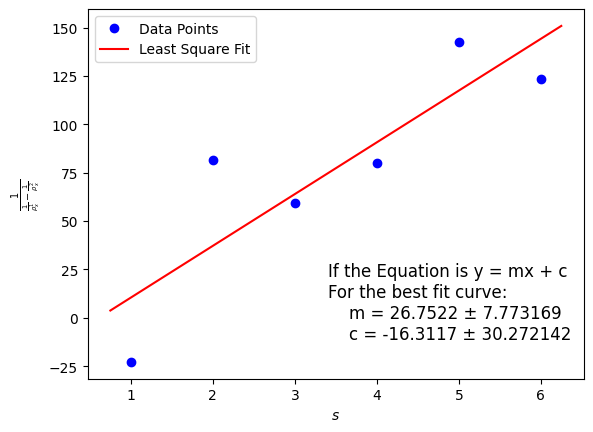

In [52]:
round_to = 4
text = "If the Equation is y = mx + c\nFor the best fit curve:\n"
text += f"    m = {round(popt[0], round_to)} ± {round((pcov[0][0])**0.5, round_to+2)}\n"
text += f"    c = {round(popt[1], round_to)} ± {round((pcov[1][1])**0.5, round_to+2)}\n"
print(text)
print("The curve looks like:")
span = max(xs) - min(xs)
a = 0.05 # This variable stores the amount of free space to be shown before the least point and 
# after the maximum point. Keep this value low for best results. 
factor = span*a

xFit = np.arange(min(xs)-factor, max(xs)+factor, 1e-3)

plt.plot(xs, ys, 'bo') 
plt.plot(xFit, func(xFit, popt[0], popt[1]), 'r')

# error lines 
# plt.plot(xFit, func(xFit, popt[0]+((pcov[0][0])**0.5), popt[1]+((pcov[1][1])**0.5)), "b--") # "b--" means blue dashed lines                          ^                            ^
# plt.plot(xFit, func(xFit, popt[0]-((pcov[0][0])**0.5), popt[1]-((pcov[1][1])**0.5)), "b--")

plt.legend(["Data Points", "Least Square Fit", "Error Boundaries"])
plt.ylabel(r"$\frac{1}{\frac{1}{\rho_{x}^1}-\frac{1}{\rho_{x}^2}}$")
plt.xlabel(r"$s$")

plt.text(0.5, 0.15, text, fontsize=12, transform=plt.gcf().transFigure)
# plt.title("least square fit of \n $\\Delta d$ vs Change in number of fringes")

# Poisson's Ratio

## 250g (y-axis)

In [13]:
def y_axis(m, top_fringes, bottom_fringes)
m = 250 #gm
n_y = np.arange(1, len(top_fringes))
top_fringes = np.array([15.21, 18.0, 19.99, 21.66, 23.36, 25.62])
bottom_fringes_1 = np.array([9.60, 6.97, 5.66, 4.72, 3.84, 3.4])
D_y_1 = (top_fringes_1 - bottom_fringes_1)
D_y2_1 = np.power(D_y_1, 2)
# Dny = 2yn => yn^2 = Dny^2/4
rho_y_1 = ((D_y2_1) - np.min(D_y2_1)) / 4
R_y_1 = (rho_y_1[1:]*1000)/(n_y_1*589)
R_avg_y_1 = np.mean(R_y_1)
D_y_1, D_y2_1, rho_y_1, R_y_1, R_avg_y_1

(array([ 5.61, 11.03, 14.33, 16.94, 19.52, 22.22]),
 array([ 31.4721, 121.6609, 205.3489, 286.9636, 381.0304, 493.7284]),
 array([  0.      ,  22.5472  ,  43.4692  ,  63.872875,  87.389575,
        115.564075]),
 array([38.28047538, 36.9008489 , 36.14763724, 37.09234932, 39.2407725 ]),
 37.53241666666666)

## 200g (y-axis)

In [46]:
m2 = 200 #gm
n_y_2 = np.arange(1, 4)
top_fringes_2 = np.array([8.01, 6.55, 5.01, 4.52])
bottom_fringes_2 = np.array([17.5, 20.02, 22.24, 24.07])
D_y_2 = (top_fringes_2 - bottom_fringes_2)
D_y2_2 = np.power(D_y_2, 2)
# Dny = 2yn => yn^2 = Dny^2/4
rho_y_2 = ((D_y2_2) - np.min(D_y2_2)) / 4
R_y_2 = (rho_y_2[1:]*1000)/(n_y_2*589)
R_avg_y_2 = np.mean(R_y_2)
D_y_2, D_y2_2, rho_y_2, R_y_2, R_avg_y_2

(array([ -9.49, -13.47, -17.23, -19.55]),
 array([ 90.0601, 181.4409, 296.8729, 382.2025]),
 array([ 0.    , 22.8452, 51.7032, 73.0356]),
 array([38.78641766, 43.89066214, 41.33310696]),
 41.33672891907187)

## Calculating Poisson's Ratio

In [53]:
sigma_1 = R_avg_x_1 / R_avg_y_1
sigma_2 = R_avg_x_2 / R_avg_y_2
sigma = (sigma_1+sigma_2)/2
print('Poisson\'s Ratio:', sigma)
sigma_1, R_avg_x_1, R_avg_y_1, sigma_2, R_avg_x_2, R_avg_y_2

Poisson's Ratio: 0.2659224842141663


(0.2549273759244763,
 9.568040492937412,
 37.53241666666666,
 0.2769175925038563,
 11.446867454253914,
 41.33672891907187)